In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
# Loading the dataset

solar_dataset = pd.read_excel("Junior Data Analyst _ Data.xlsx", skiprows=2) 
solar_dataset.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [3]:
# Shape of the data 

solar_dataset.shape

(8760, 4)

In [4]:
# Data types 

solar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [5]:
# Missing values 

solar_dataset.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

### 1. Data Visualization and Checks 

**Goal:** Visualizing and comparing average solar electricity generation and electricity usage for each hour in a day

In [6]:
solar_dataset.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


Text(0, 0.5, 'Electricity (kW/h')

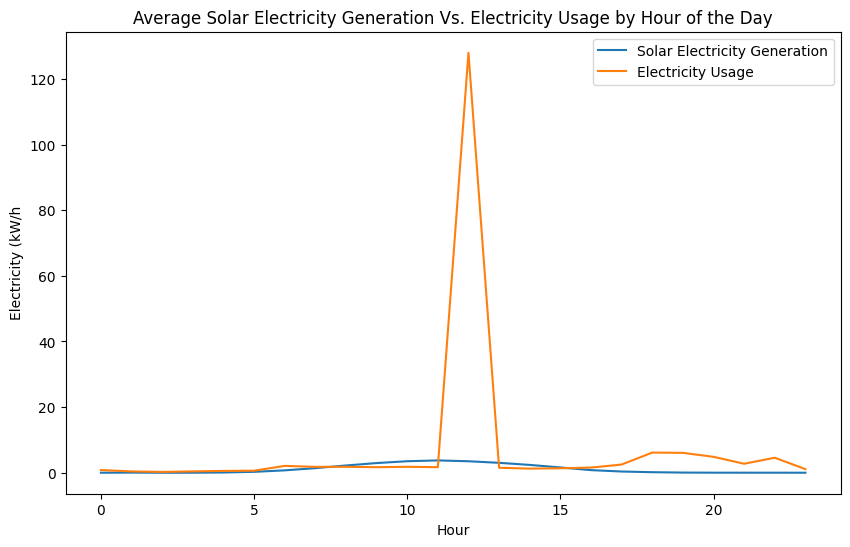

In [7]:
average_df = solar_dataset.groupby("Hour").agg({"Solar electricity generation (kWh)": "mean", "Electricity usage (kWh)": "mean"}).reset_index() 

fig, ax = plt.subplots(figsize=(10, 6)) 

sns.lineplot(data=average_df, x="Hour", y="Solar electricity generation (kWh)", label="Solar Electricity Generation")
sns.lineplot(data=average_df, x="Hour", y="Electricity usage (kWh)", label="Electricity Usage") 

plt.title("Average Solar Electricity Generation Vs. Electricity Usage by Hour of the Day") 
plt.xlabel("Hour") 
plt.ylabel("Electricity (kW/h")

<Axes: ylabel='Electricity usage (kWh)'>

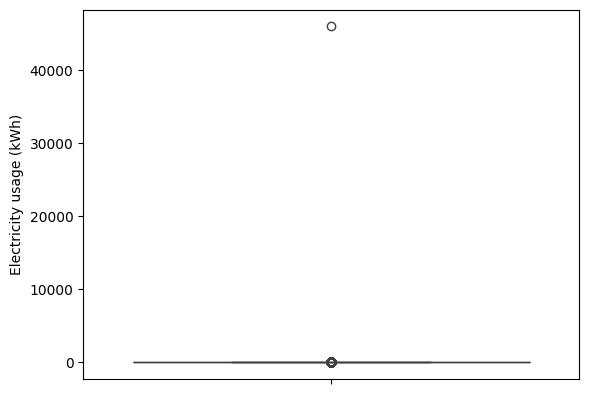

In [8]:
sns.boxplot(data=solar_dataset, y="Electricity usage (kWh)")

<Axes: ylabel='Solar electricity generation (kWh)'>

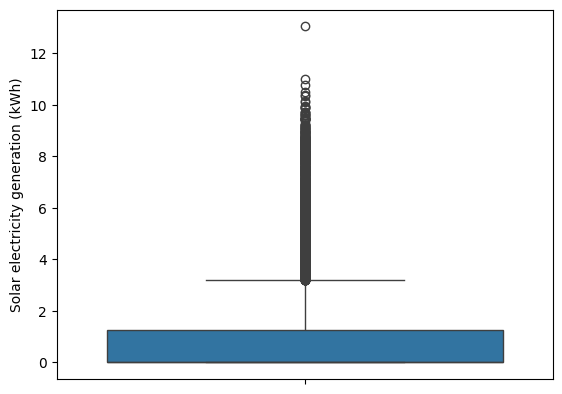

In [9]:
sns.boxplot(data=solar_dataset, y="Solar electricity generation (kWh)")

<Axes: >

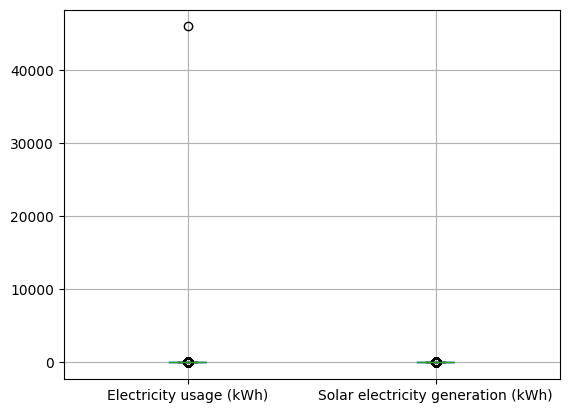

In [10]:
# Checking for outliers 

solar_dataset.boxplot(column=["Electricity usage (kWh)", "Solar electricity generation (kWh)"])

<Axes: ylabel='Solar electricity generation (kWh)'>

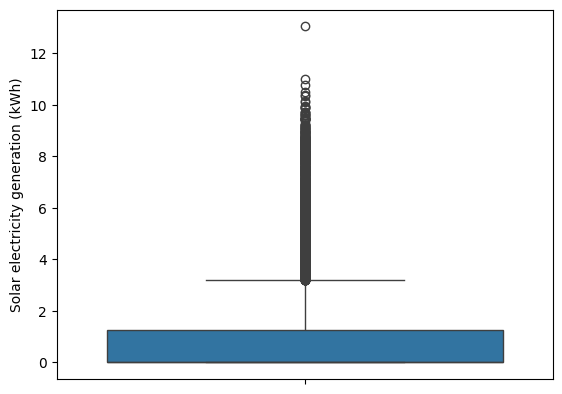

In [11]:
# Remove outliers for Electricity Usage 

# Lower Quartile
Q1 = solar_dataset["Solar electricity generation (kWh)"].quantile(0.25)

# Upper quartile
Q3 = solar_dataset["Solar electricity generation (kWh)"].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_boundary = Q1 - IQR * 1.5 

upper_boundary = Q3 + IQR * 1.5 

# IRemoving outliers 
solar_dataset = solar_dataset[~(solar_dataset["Solar electricity generation (kWh)"] < lower_boundary) | (solar_dataset["Solar electricity generation (kWh)"] > upper_boundary)] 

sns.boxplot(data=solar_dataset, y="Solar electricity generation (kWh)")


<Axes: ylabel='Electricity usage (kWh)'>

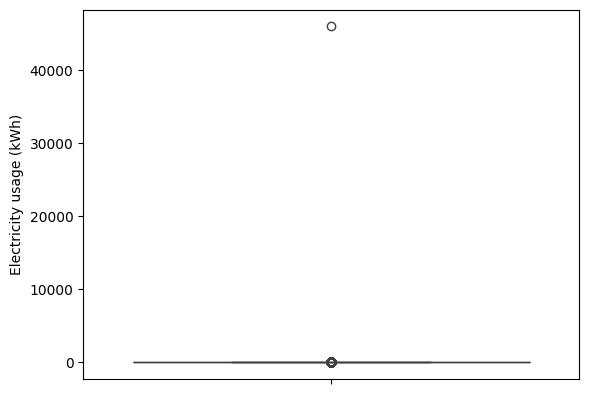

In [12]:
# Lower Quartile
Q1 = solar_dataset["Electricity usage (kWh)"].quantile(0.25)

# Upper quartile
Q3 = solar_dataset["Electricity usage (kWh)"].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_boundary = Q1 - IQR * 1.5 

upper_boundary = Q3 + IQR * 1.5 

# IRemoving outliers 
solar_dataset = solar_dataset[~(solar_dataset["Electricity usage (kWh)"] < lower_boundary) | (solar_dataset["Electricity usage (kWh)"] > upper_boundary)] 

sns.boxplot(data=solar_dataset, y="Electricity usage (kWh)") 

In [13]:
average_df = solar_dataset.groupby("Hour").agg({"Solar electricity generation (kWh)": "mean", "Electricity usage (kWh)": "mean"}).reset_index() 

<Axes: >

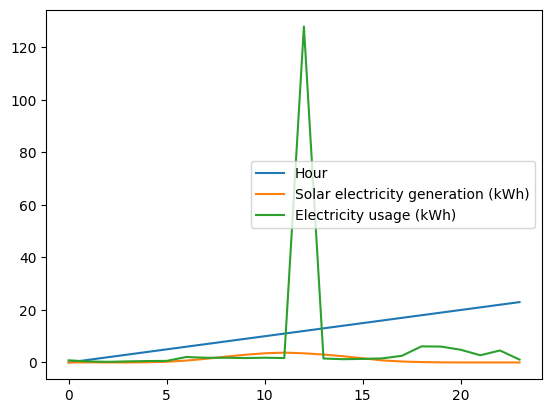

In [15]:
average_df.plot(kind="line")